In [154]:
import pandas as pd
import numpy as np

In [155]:
data = pd.read_csv('Bengaluru_House_Data.csv')

In [156]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [157]:
data.shape

(13320, 9)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [159]:
for column in data.columns:
  print(data[column].value_counts())
  print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64
********************
siz

In [160]:
data.isna().sum() #to check how many null values in the given columns

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [161]:
print("Missing values", data['balcony'].isna().mean()*100) #percentage missing

Missing values 4.572072072072072


In [162]:
print("Value counts", data["balcony"].value_counts(normalize=True))

Value counts balcony
2.0    0.402250
1.0    0.385257
3.0    0.131540
0.0    0.080954
Name: proportion, dtype: float64


In [163]:
print(np.issubdtype(data['balcony'].dtype , np.number))

True


In [164]:
corr = data['balcony'].corr(data['price'])
print (corr)

0.12035530938067719


In [165]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [92]:
!pip install ydata-profiling


In [93]:
from ydata_profiling import ProfileReport
prof= ProfileReport(data)
prof.to_file(output_file= 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 16.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [94]:
data.drop(columns=['area_type', 'availability', 'society', 'balcony'], inplace= True)
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [95]:
from ydata_profiling import ProfileReport
prof= ProfileReport(data)
prof.to_file(output_file= 'output_after_removing_features.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 5/5 [00:00<00:00, 22.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [96]:
data['location'] = data['location'].fillna('Sarjapur Road')

In [97]:
data['size']= data['size'].fillna('2 BHK')

In [98]:
data['bath']= data['bath'].fillna(data['bath'].median())

In [99]:
data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [100]:
data['bhk'] = data['size'].str.split().str.get(0).astype(int)
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


OUTLIER REMOVAL

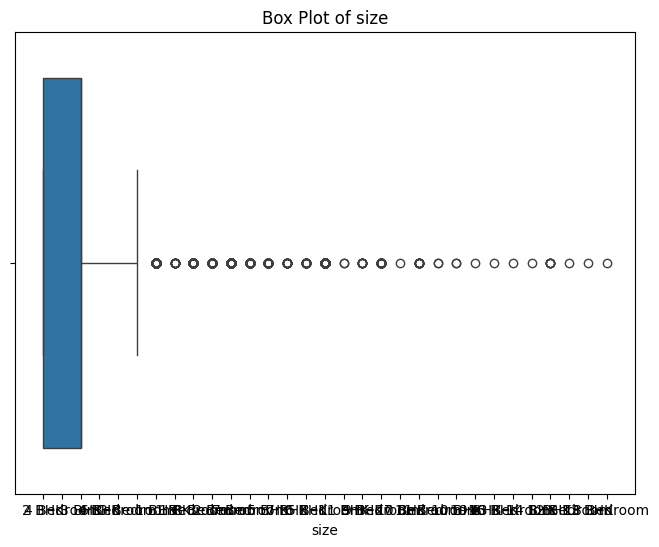

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "size"
plt.figure(figsize=(8, 6))
sns.boxplot(x=data[col])
plt.title(f'Box Plot of {col}')
plt.show()

In [102]:
data[data.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [103]:
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [104]:
def convertRange(x):
  temp = x.split('-')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None


In [105]:
data['total_sqft']= data['total_sqft'].apply(convertRange)

In [106]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [107]:
print(data['size'].dtype)

object


In [108]:
def convertRooms(x):
  temp = x.split(' ')
  return float(temp[0])

In [109]:
data['size']= data['size'].apply(convertRooms)

In [110]:
data.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2.0,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4.0,2600.0,5.0,120.00,4
2,Uttarahalli,3.0,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3.0,1521.0,3.0,95.00,3
4,Kothanur,2.0,1200.0,2.0,51.00,2


#Price per Square Feet

In [111]:
data['price_per_sqft']= data['price']*100000/data['total_sqft']

In [112]:
data.describe()

,size,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,2.802778,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1.294496,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,3.000000,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,3.000000,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,43.000000,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [113]:
data['location']= data['location'].apply(lambda x: x.strip())
location_count=data['location'].value_counts()
location_count

,count
location,
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
Thanisandra,237
...,...
Xavier Layout,1
Ramanagara Channapatna,1
Maheswari Nagar,1


In [114]:
location_count_lessthan10=location_count[location_count<=10]
location_count_lessthan10.head()

,count
location,
1st Block Koramangala,10
Dairy Circle,10
Nagadevanahalli,10
Sadashiva Nagar,10
Naganathapura,10


In [115]:
data['location']=data['location'].apply(lambda x: 'other' if x in location_count_lessthan10 else x)
data['location'].value_counts()

,count
location,
other,2886
Whitefield,541
Sarjapur Road,399
Electronic City,304
Kanakpura Road,273
...,...
Tindlu,11
Marsur,11
2nd Phase Judicial Layout,11


#OUTLIER DETECTION AND REMOVAL

In [116]:
data.drop(columns=['size'], inplace= True)

In [117]:
data.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [118]:
(data['total_sqft']/data['bhk']).describe()

,0
count,13274.000000
mean,575.074878
std,388.205175
min,0.250000
25%,473.333333
50%,552.500000
75%,625.000000
max,26136.000000


In [119]:
data=data[(data['total_sqft']/data['bhk']) >300]
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12348.000000,12348.000000,12348.000000,12348.000000,12348.000000
mean,1601.084689,2.542274,110.823169,2.633301,6207.869136
std,1268.788019,1.065177,152.794399,0.964402,4047.666274
min,340.000000,1.000000,8.440000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4200.000000
50%,1305.000000,2.000000,69.475000,3.000000,5264.632169
75%,1708.000000,3.000000,115.000000,3.000000,6825.108836
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [120]:
data.shape

(12348, 6)

In [121]:
data['price_per_sqft'].describe()

,price_per_sqft
count,12348.000000
mean,6207.869136
std,4047.666274
min,267.829813
25%,4200.000000
50%,5264.632169
75%,6825.108836
max,176470.588235


In [122]:
def remove_outliers_sqft(df):
  df_output= pd.DataFrame()
  for key, subdf in df.groupby('location'): #subdf is sub dataframe
    m= np.mean(subdf.price_per_sqft)
    st= np.std(subdf.price_per_sqft) #std= standard deviation
    gen_df= subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output= pd.concat([df_output, gen_df], ignore_index= True)
  return df_output
data= remove_outliers_sqft(data)
data.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10079.000000,10079.000000,10079.000000,10079.000000,10079.000000
mean,1509.254783,2.461653,90.972439,2.562258,5626.018262
std,881.846858,0.965002,86.431935,0.879000,2208.837162
min,350.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4248.717576
50%,1290.000000,2.000000,67.000000,2.000000,5166.666667
75%,1650.000000,3.000000,100.000000,3.000000,6393.652258
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [123]:
data.shape

(10079, 6)

In [124]:
def bhk_outlier_remover(df): #as bhk increases, total_sqft should remain the same or inc for a particular location
  exclude_indices= np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats= {} #empty dictionary
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]= {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
      for bhk, bhk_df in location_df.groupby('bhk'):
        stats= bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices= np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

data=bhk_outlier_remover(data)

In [125]:
data.shape

(7206, 6)

In [126]:
data.drop(columns=['price_per_sqft'], inplace= True)

In [127]:
data

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10070,other,1200.0,2.0,70.0,2
10071,other,1800.0,1.0,200.0,1
10074,other,1353.0,2.0,110.0,2
10075,other,812.0,1.0,26.0,1


In [128]:
data.to_csv('clean_data.csv')

In [129]:
X=data.drop(columns=['price'])
y=data['price']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [131]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [132]:
print(X_train.shape)
print(X_test.shape)

(5764, 4)
(1442, 4)


#APPLYING LINEAR REGRESSION


In [133]:
unique_locations = data['location'].unique()
column_trans = make_column_transformer(
    (OneHotEncoder(categories=[unique_locations], sparse_output=False, handle_unknown="ignore"), ['location']),
    remainder='passthrough'
)


In [134]:
scaler= StandardScaler()

In [135]:
lr= LinearRegression()

In [136]:
pipe= make_pipeline(column_trans, scaler, lr)

In [137]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout',...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)],
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [138]:
y_pred_lr= pipe.predict(X_test)

In [139]:
r2_score(y_test, y_pred_lr)

0.8404014703847429

In [140]:
import joblib
from google.colab import files

# Save the model to a file
joblib.dump(pipe, "House_Prediction_Model.pkl", protocol=4)


# Download the file to your local system
files.download("House_Prediction_Model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#APPLYING LASSO


In [141]:
lasso= Lasso()

In [142]:
pipe= make_pipeline(column_trans, scaler, lasso)

In [143]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout',...
       'Ulsoor', 'Uttarahalli', 'Varthur', 'Varthur Road', 'Vasanthapura',
       'Vidyaranyapura', 'Vijayanagar', 'Vishveshwarya Layout',
       'Vishwapriya Layout', 'Vittasandra', 'Whitefield',
       'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town', 'Yelenahalli',
       'Yeshwanthpur', 'other'], dtype=object)],
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [144]:
y_pred_lasso= pipe.predict(X_test)
r2_score(y_test, y_pred_lasso)

0.8327110181329448

#APPLYING RIDGE

In [145]:
ridge= Ridge()

In [146]:
pipe_main= make_pipeline(column_trans, scaler, ridge)

In [147]:
pipe_main.fit(X_train, y_train)
y_pred_ridge= pipe_main.predict(X_test)

In [148]:
 r2_score(y_test, y_pred_ridge)

0.8404350694569988

In [149]:
data.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [150]:
loaded_model = joblib.load('model.pkl')

In [151]:
def predict_price(location, bath, bhk, model):
  """
  Predicts the price of a house based on location, bath, and bhk.

  Args:
    location (str): The location of the house.
    bath (int): The number of bathrooms.
    bhk (int): The number of bedrooms.
    model: The trained machine learning model.

  Returns:
    float: The predicted price of the house.
  """
  input_data = pd.DataFrame([[location, 1400, bath, bhk]], columns=['location', 'total_sqft', 'bath', 'bhk'])
  predicted_price = model.predict(input_data)[0]
  return predicted_price

# Get user input
location = input("Enter the location: ")
bath = int(input("Enter the number of bathrooms: "))
bhk = int(input("Enter the number of bedrooms (bhk): "))

# Assuming 'pipe_main' is your trained model (using the Ridge model)
predicted = predict_price(location, bath, bhk, loaded_model)
print(f"Predicted price: {predicted}")

Enter the location: Kengeri
Enter the number of bathrooms: 2
Enter the number of bedrooms (bhk): 2
Predicted price: 80.58578908412743


In [152]:
2

2

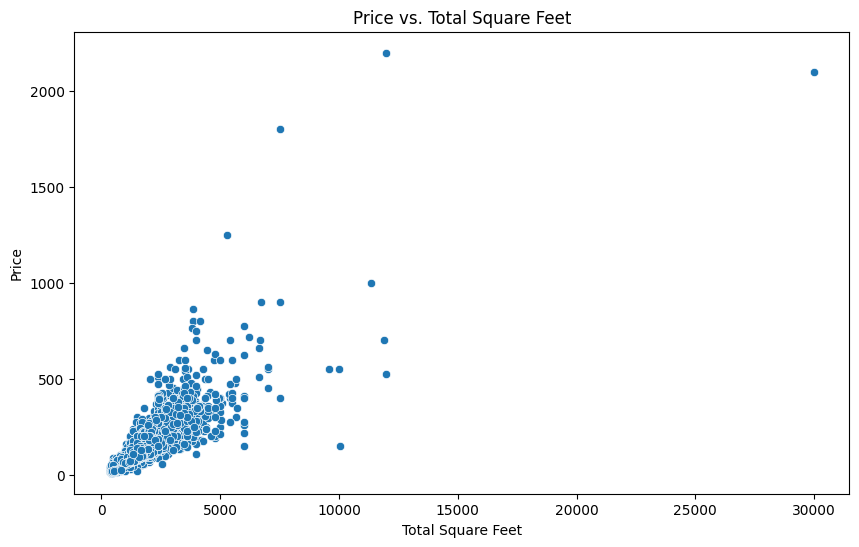

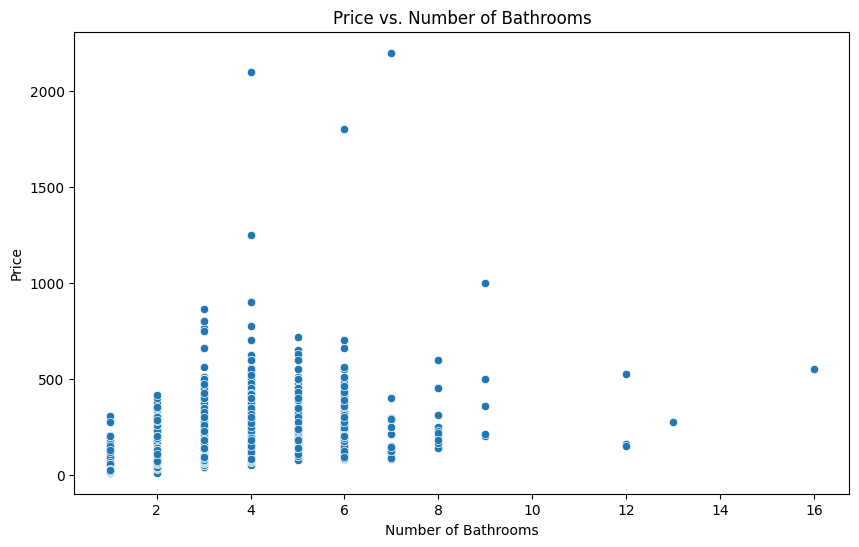

In [153]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=data)
plt.title('Price vs. Total Square Feet')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bath', y='price', data=data)
plt.title('Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()